In [1]:
# test of ONE INSERT
# 1. import the b0 map without any shims. |before|
# import b0map as an object
import numpy as np  
import b0
b0map_before = b0.b0()
filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'
b0map_before.import_from_csv(filename_to_import_csv_data_from)
b0map_before.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet



No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240719/Thursday_ball_R120_12pts,,,,,,
 not used. path data taken from csv!
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [-1.49212153e-03  2.23818229e-03 -3.57200575e+00]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 11487
len(b0Data)= 11487
-111.4292539392357  < x <  111.4307460607643
-116.42575607208154  < y <  115.00424392791848
-115.00349786715418  < z <  107.85650213284583
z step: 8.569999999999993
z step: 8.569999999999993
z step: 8.569999999999993
z step: 8.569999999999993
z step: 8.569999999999993
z step: 8.570000000000022
z step: 8.57000000000005
z step: 8.57000000000005
z step: 8.570

In [2]:
# 2. import the b0 map without any shims. |after|
# import b0map as an object
b0map_after = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/ball_no_rings_one_insert3_ALONG_field_12pts_R120_bvals_shifted.csv'
b0map_after.import_from_csv(filename_to_import_csv_data_from)
b0map_after.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/ball_no_rings_one_insert3_ALONG_field_12pts_R120_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/ball_no_rings_one_insert3_ALONG_field_12pts_R120,,,,,,
 not used. path data taken from csv!
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [ 0.00280662 -0.01683974 -0.01543643]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 7126
len(b0Data)= 7126
-110.01403311815879  < x <  109.9859668818412
-110.0014033118159  < y <  109.99859668818416
-110.01262980634294  < z <  109.98737019365711
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z s

In [3]:
print('before: ',np.nanmin(b0map_before.b0Data[:,:,:,0]),np.nanmax(b0map_before.b0Data[:,:,:,0]))
print('after: ',np.nanmin(b0map_after.b0Data[:,:,:,0]),np.nanmax(b0map_after.b0Data[:,:,:,0]))


# spherical decomposition
diameter_of_sphere = b0map_before.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)



before:  -47.809 -47.394
after:  -47.795 -47.42
239.91103289828555
(27, 28, 27)
Mean field strength in 23 cm sphere: -47.55 mT
Inhomogeneity in 23 cm sphere: -5783 ppm
Inhomogeneity of fit: 5679 ppm
Error: -305009340 ppm
saved numpy array as ./data/tmp/SpHData.npy
(23, 23, 23)
Mean field strength in 23 cm sphere: -47.56 mT
Inhomogeneity in 23 cm sphere: -7885 ppm
Inhomogeneity of fit: 8168 ppm
Error: 89731158 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 5384 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 7653 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


<Figure size 640x480 with 0 Axes>

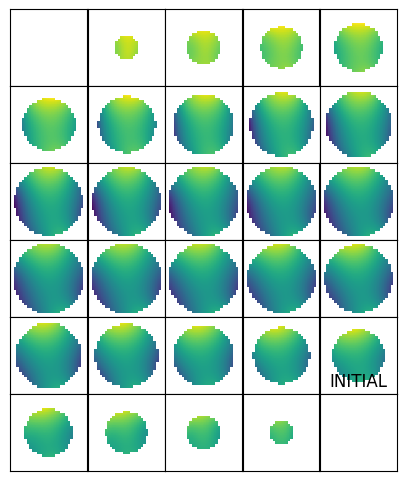

In [5]:
# plot the initial field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine
initialField = b0map_before.interpolatedField


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(initialField[i+j*5,:,:],clim=[np.nanmin(initialField),np.nanmax(initialField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('INITIAL')

plt.savefig('./pics/init_field_iter2.png',format="png")
plt.savefig('./pics/init_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


<Figure size 640x480 with 0 Axes>

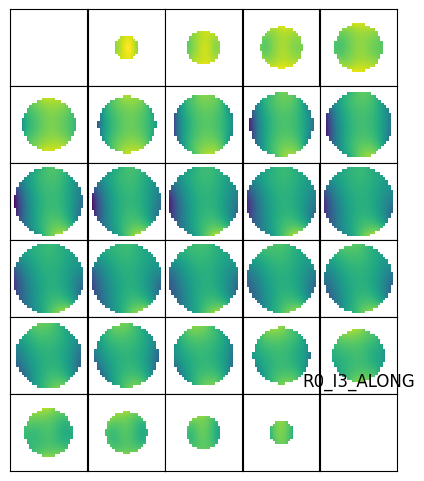

In [7]:
# plot the R0I3 insert field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_after.xDim_SPH_fine
field1Insert = b0map_after.interpolatedField


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(field1Insert[i+j*5,:,:],clim=[np.nanmin(field1Insert),np.nanmax(field1Insert)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3_ALONG')

plt.savefig('./pics/insert3_ring_0_field_iter2.png',format="png")
plt.savefig('./pics/insert3_ring_0_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


<Figure size 640x480 with 0 Axes>

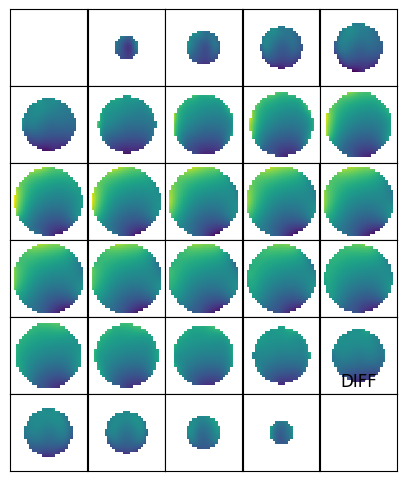

In [8]:
# plot the difference field init - insert
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine
diffField = b0map_before.interpolatedField - b0map_after.interpolatedField


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(diffField[i+j*5,:,:],clim=[np.nanmin(diffField),np.nanmax(diffField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('DIFF')

plt.savefig('./pics/diff_field_R0I3.png',format="png")
plt.savefig('./pics/diff_field_R0I3.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [9]:
print('now we have an interpolated field.')
print(np.shape(b0map_before.interpolatedField))
print('on a coordinate grid')
print(np.shape(b0map_before.coord_grid_fine))


now we have an interpolated field.
(30, 30, 30)
on a coordinate grid
(3, 30, 30, 30)


In [ ]:

#??? lets generate a shim field of one insert.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2)

In [10]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[-58.5 -40.5   4.5 121.5]


In [11]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
                       positions.append((ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)))

        # check if rings are in the right plane
        #print(positions) 
        
#!TEMP!!!
#?TEMP!!!
#*TEMP!!!

tmppos=[]
# finding the insert with min z and x=-58.5 (RING 0)
for position in positions:
    if abs(position[0]+58.5e-3) < 3e-3:
        if position[2] < -shimRadius*np.cos(np.pi/12):
            print(position)
            tmppos.append(position)
positions = tmppos


#pos = [0,-20e-3,60e-3]
#positions = []
#positions.append(pos)
#print(len(positions))


let us position some magnets on a circumference of a R=276 mm YZ circle with X=0
(-0.0585, -0.046146910961402755, -0.27211479674710887)
(-0.0585, -0.030845208788272276, -0.2742709847847707)
(-0.0585, -0.015446815196073526, -0.27556740718070843)
(-0.0585, -5.070037748470042e-17, -0.276)
(-0.0585, 0.015446815196073426, -0.27556740718070843)
(-0.0585, 0.03084520878827218, -0.2742709847847707)
(-0.0585, 0.04614691096140265, -0.27211479674710887)


magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  30
computing field of one shim magnet at  -0.0585 -0.046146910961402755 -0.27211479674710887
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  30
computing field of one shim magnet at  -0.0585 -0.030845208788272276 -0.2742709847847707
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  30
computing field of one shim magnet at  -0.0585 -0.015446815196073526 -0.27556740718070843
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  30
computing field of one shim magnet at  -0.0585 -5.07003

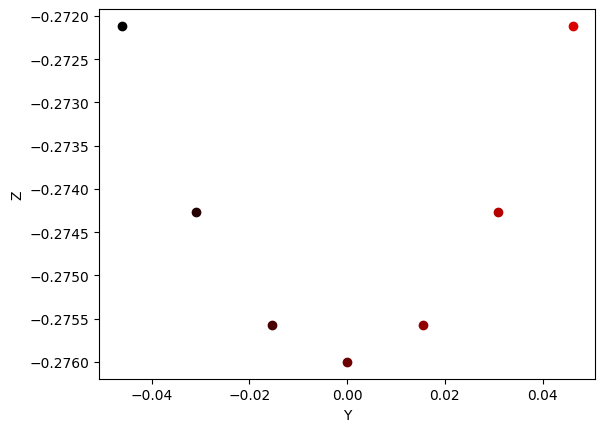

In [12]:

import matplotlib.pyplot as plt
for idx,position in enumerate(positions):

    plt.scatter(position[1],position[2],color = [idx/len(positions),0,0])

plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_before.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_before.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_before.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3

print(DSV)


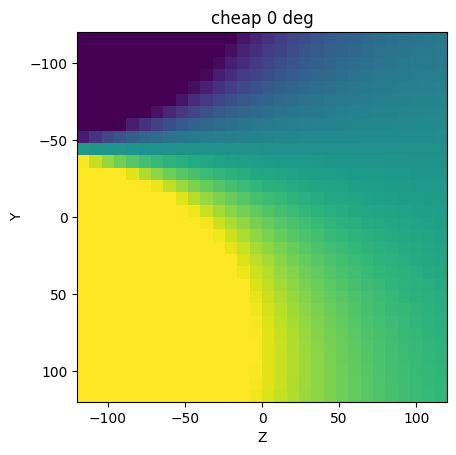

[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35


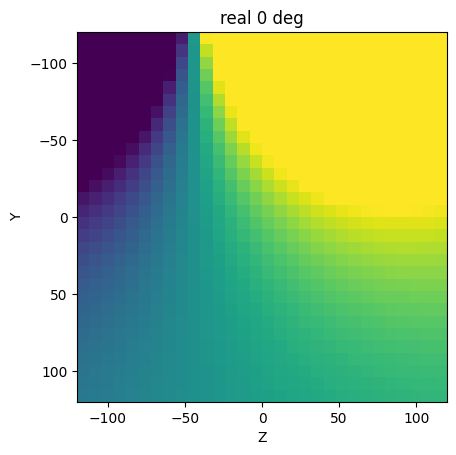

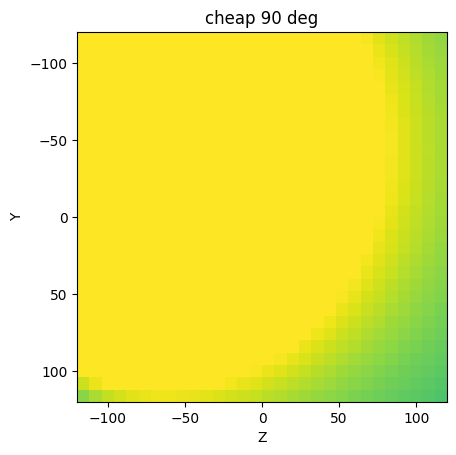

[0.00000000e+00 1.42088363e-24 2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35


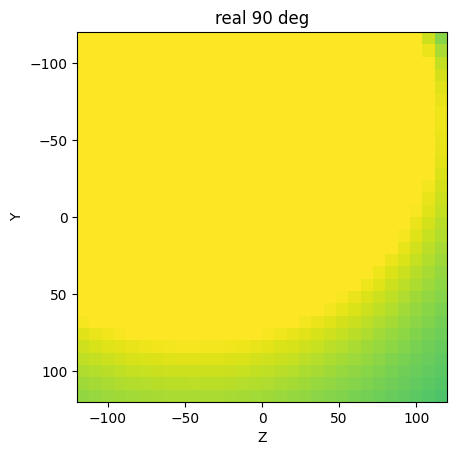

In [13]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_before.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/4
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()

[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35


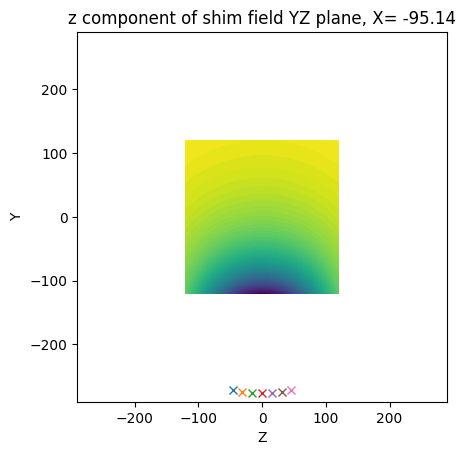

In [15]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_before.xDim_SPH_fine*1e0
Y = b0map_before.yDim_SPH_fine*1e0
Z = b0map_before.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(7):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = -2*np.pi/4
    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 3
ax.contourf(y2d,z2d,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_one_insert.png',format="png")
plt.savefig('./pics/field_of_one_insert.pdf',format="pdf")

plt.show()

In [16]:
OneInsertField = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = -np.pi/2
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    OneInsertField += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)


oneInsertShimField = initialField+OneInsertField*1.0e3


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_oneInsert = (np.nanmax(oneInsertShimField)-np.nanmin(oneInsertShimField))/np.nanmean(oneInsertShimField)*1e6
print('homo with one insert ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_oneInsert)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(oneInsertShimField))))


print('init min: ',np.nanmin(initialField))
print('affected min: ',np.nanmin(oneInsertShimField))


[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
!!!!!!!!!!!!!!!!!!!!!! 1.35
homo with one insert ppm 5384 -> 5150
mean mT 47.70 -> 47.71
init min:  -47.701644220922546
affected min:  -47.70991695446189


30


<Figure size 640x480 with 0 Axes>

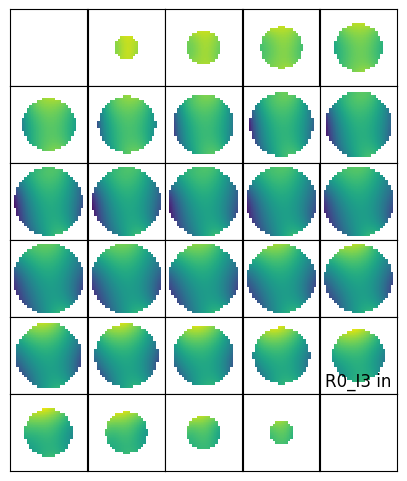

In [19]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine

shimoffset = np.nanmean(oneInsertShimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(oneInsertShimField[i+j*5,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3 in, expected')

plt.savefig('./pics/one_insert_field_expected.png',format="png")
plt.savefig('./pics/one_insert_field_expected.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


30


<Figure size 640x480 with 0 Axes>

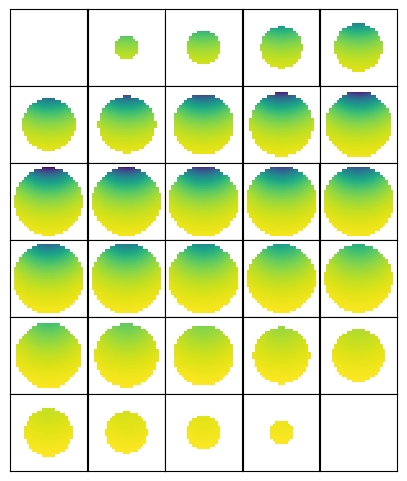

In [18]:
# Difference between one-insert field and init field:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_before.xDim_SPH_fine

shimoffset = 0# np.nanmean(oneInsertShimField-initialField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(oneInsertShimField[i+j*5,:,:]-initialField[i+j*5,:,:],clim=[np.nanmin(oneInsertShimField-initialField)+shimoffset,np.nanmax(oneInsertShimField-initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./pics/oneinsert-initial-expected.png',format="png")
plt.savefig('./pics/oneinsert-initial-expected.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
for position in positions:
    print(position)